<a href="https://colab.research.google.com/github/GaneshiUmayangana/BreastCancer-Prediction/blob/main/curemind_with_smote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,4)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
data_set = pd.read_csv("data.csv")
data_set

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
data_set.shape

(569, 33)

In [ ]:
data_set.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data_set.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [ ]:
data_set.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
data_set.duplicated().sum()

0

In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data_set['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
data_set = data_set.drop(['id','Unnamed: 32'],axis=1)
data_set

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
data_set.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
y = data_set['diagnosis']

In [ ]:
X = data_set.drop('diagnosis',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
train_set = pd.concat([X_train,y_train],axis=1)
train_set
train_set.shape

(455, 31)

In [ ]:
test_set = pd.concat([X_test,y_test],axis=1)
test_set
test_set.shape

(114, 31)

In [ ]:
X_train.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.336934,0.997946,0.987038,0.155727,0.521559,0.719517,0.830257,0.136889,-0.317144,...,0.969398,0.295950,0.964153,0.943283,0.090981,0.439461,0.569775,0.756042,0.152335,0.022305
texture_mean,0.336934,1.000000,0.342687,0.334507,-0.036416,0.249385,0.339384,0.309993,0.073354,-0.082661,...,0.372165,0.909002,0.377564,0.365058,0.062628,0.297932,0.337717,0.315571,0.109658,0.138726
perimeter_mean,0.997946,0.342687,1.000000,0.986395,0.190818,0.570740,0.757186,0.857494,0.169713,-0.267941,...,0.969575,0.302246,0.969709,0.944364,0.121637,0.480757,0.605480,0.781962,0.173339,0.066113
area_mean,0.987038,0.334507,0.986395,1.000000,0.164818,0.513240,0.724681,0.830007,0.139669,-0.288859,...,0.960865,0.287614,0.956812,0.959682,0.097993,0.413809,0.548673,0.731099,0.129682,0.016408
smoothness_mean,0.155727,-0.036416,0.190818,0.164818,1.000000,0.636728,0.497682,0.530420,0.550589,0.578380,...,0.193025,0.009373,0.219139,0.190693,0.791682,0.446820,0.406251,0.467957,0.354689,0.477206
compactness_mean,0.521559,0.249385,0.570740,0.513240,0.636728,1.000000,0.892612,0.836370,0.573931,0.549106,...,0.553408,0.247531,0.608271,0.530966,0.541051,0.865225,0.823111,0.816454,0.468825,0.686387
concavity_mean,0.719517,0.339384,0.757186,0.724681,0.497682,0.892612,1.000000,0.938155,0.457960,0.278521,...,0.727656,0.322490,0.769943,0.714776,0.429289,0.770983,0.883312,0.875083,0.360946,0.497214
concave points_mean,0.830257,0.309993,0.857494,0.830007,0.530420,0.836370,0.938155,1.000000,0.436838,0.145656,...,0.835008,0.292355,0.860268,0.816599,0.425980,0.680928,0.770253,0.910389,0.337298,0.367950
symmetry_mean,0.136889,0.073354,0.169713,0.139669,0.550589,0.573931,0.457960,0.436838,1.000000,0.451516,...,0.176332,0.075621,0.209650,0.169420,0.408684,0.438258,0.388258,0.391040,0.666327,0.397835
fractal_dimension_mean,-0.317144,-0.082661,-0.267941,-0.288859,0.578380,0.549106,0.278521,0.145656,0.451516,1.000000,...,-0.258557,-0.058531,-0.207923,-0.236055,0.506969,0.434178,0.289952,0.147237,0.301872,0.756037


# PLOTS


<Axes: >

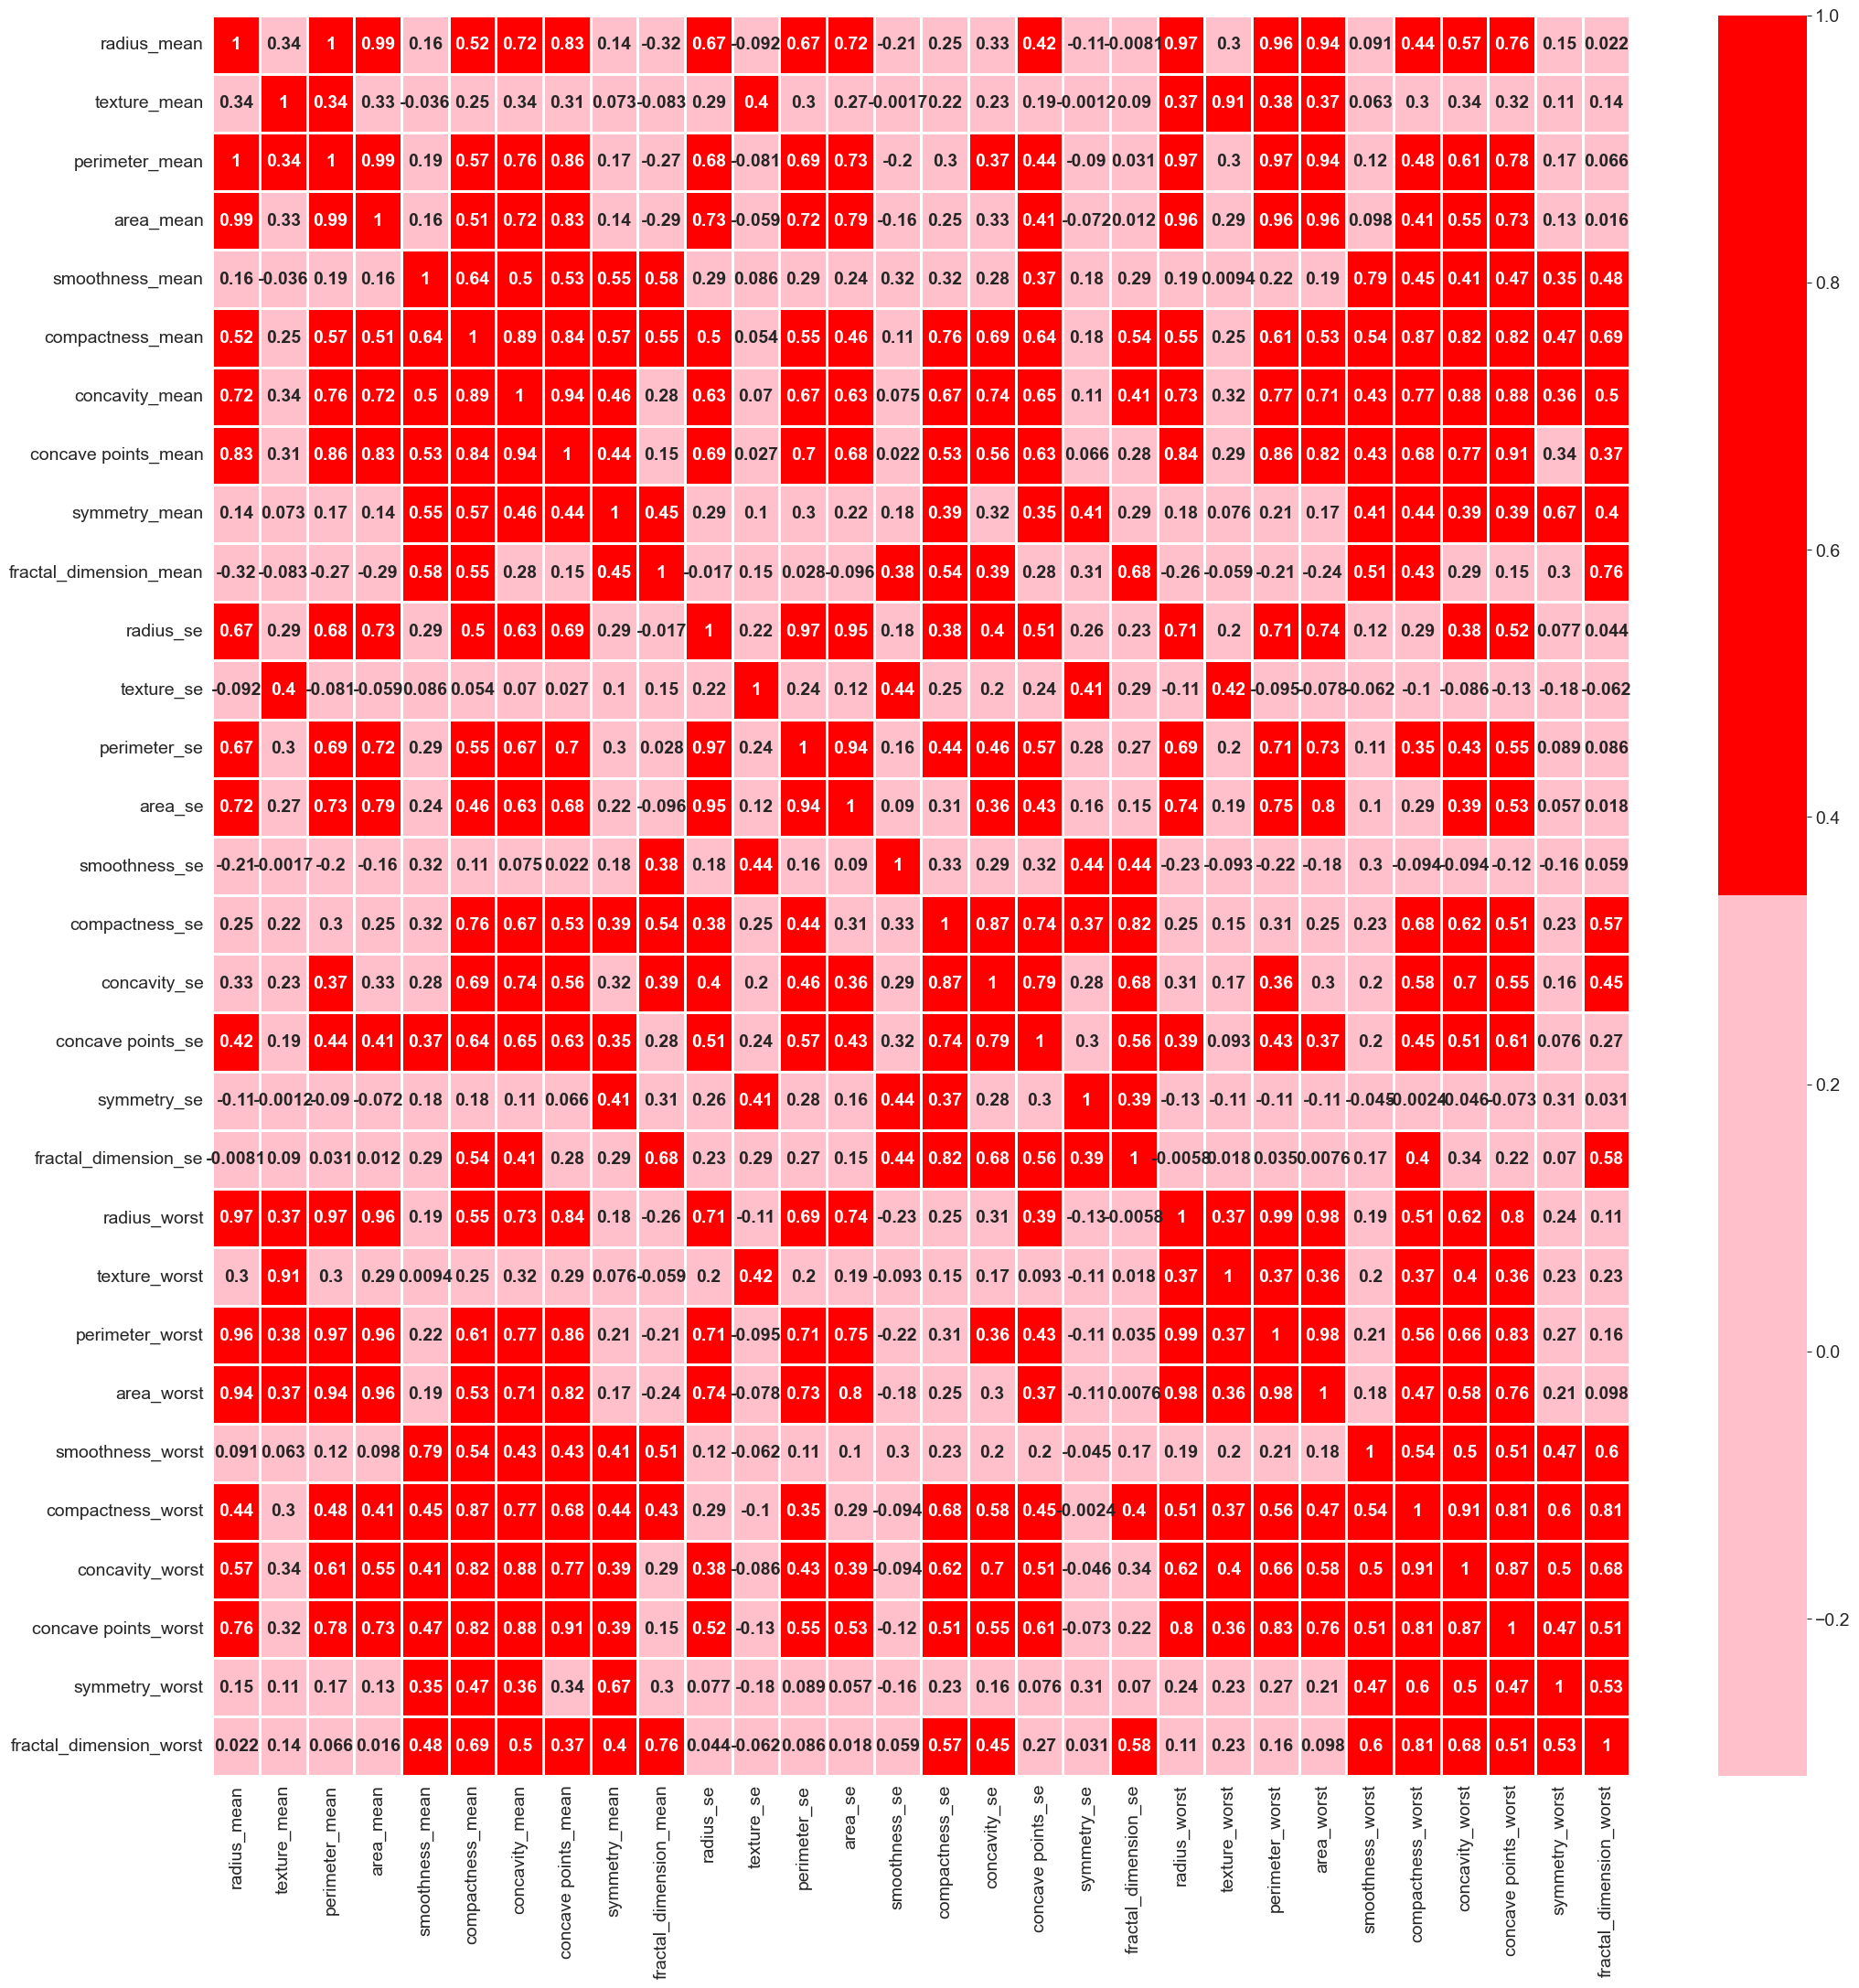

In [ ]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(25, 25))
custom_cmap = ListedColormap(['pink','red'])
sns.heatmap(X_train.corr(),cmap=custom_cmap, linewidths=2, linecolor='white', annot=True,annot_kws={"weight": "bold"})

<Axes: xlabel='diagnosis', ylabel='count'>

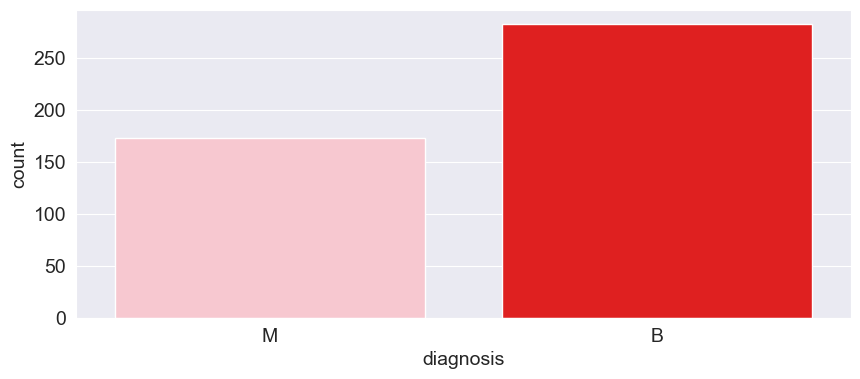

In [ ]:
palette_colors = ['pink', 'red']
plt.ylabel('Frequency')
sns.countplot(x='diagnosis', data=train_set,palette=palette_colors)

# Applying Smote Technique


In [ ]:
smt = SMOTE(random_state = 10)

In [ ]:
X_train_sm,y_train_sm = smt.fit_resample(X_train, y_train)

In [ ]:
counter_sm = Counter(y_train_sm)
print('After:',counter_sm)

After: Counter({'M': 282, 'B': 282})


# Random forest feature importance

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
dt = DecisionTreeClassifier(random_state=10)

In [ ]:
dt.fit(X_train_sm,y_train_sm)
y_pred_dt  = dt.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred_dt)

0.9035087719298246

In [ ]:
importances = dt.feature_importances_

In [ ]:
feature_importance_df = pd.DataFrame(importances,index=X_train_sm.columns,columns=['Importance'])
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)

Feature Importance:
                         Importance
concave points_mean        0.711778
area_worst                 0.078413
concavity_worst            0.074601
perimeter_worst            0.023130
texture_worst              0.017314
area_se                    0.013537
texture_mean               0.013359
radius_se                  0.012158
radius_worst               0.012002
concave points_se          0.010132
perimeter_se               0.008511
smoothness_mean            0.007010
fractal_dimension_se       0.006079
symmetry_worst             0.005674
texture_se                 0.005319
smoothness_se              0.000984
smoothness_worst           0.000000
compactness_worst          0.000000
concave points_worst       0.000000
radius_mean                0.000000
compactness_se             0.000000
symmetry_se                0.000000
concavity_se               0.000000
fractal_dimension_mean     0.000000
symmetry_mean              0.000000
concavity_mean             0.000000
compactn

In [ ]:
cumulative_importance = np.cumsum(feature_importance_df['Importance'].values)
cumulative_importance

array([0.71177767, 0.79019041, 0.86479179, 0.88792156, 0.90523591,
       0.9187734 , 0.93213222, 0.94429027, 0.95629245, 0.96642417,
       0.9749348 , 0.98194432, 0.98802335, 0.99369711, 0.99901626,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

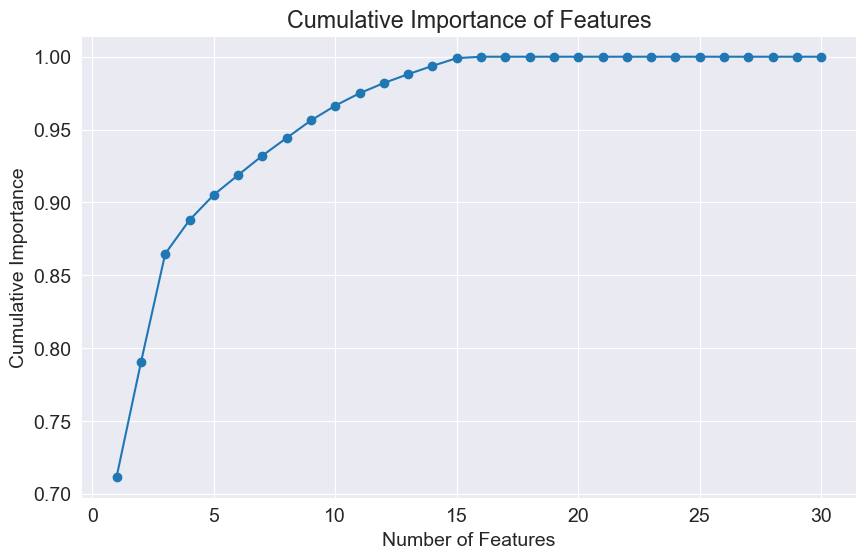

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_importance) + 1), cumulative_importance, marker='o', linestyle='-')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importance of Features')
plt.grid(True)
plt.show()

In [ ]:
optimal_num_features = np.argmax(cumulative_importance >= 0.95) + 1
print("Optimal number of features:", optimal_num_features)

Optimal number of features: 9


In [ ]:
important_features = feature_importance_df.head(9).index.tolist()

In [ ]:
X_train_selected = X_train[important_features]
y_train_selected = y_train

In [ ]:
X_train_selected

,concave points_mean,area_worst,concavity_worst,perimeter_worst,texture_worst,area_se,texture_mean,radius_se,radius_worst
567,0.15200,1821.0,0.93870,184.60,39.42,86.220,29.33,0.7260,25.74
295,0.01917,661.1,0.03732,94.17,16.93,17.740,13.27,0.2191,14.67
91,0.07483,830.9,0.28460,107.50,25.84,29.440,22.76,0.3129,16.43
1,0.07017,1956.0,0.24160,158.80,23.41,74.080,17.77,0.5435,24.99
94,0.08815,1025.0,0.52030,123.50,24.23,47.140,19.83,0.4768,18.23
...,...,...,...,...,...,...,...,...,...
369,0.15010,2227.0,0.47560,195.00,25.80,130.200,21.90,1.0080,27.66
320,0.03965,390.4,0.18980,71.53,20.61,22.680,16.18,0.3677,11.28
527,0.02647,564.9,0.17910,87.22,19.27,8.955,12.27,0.1166,13.61
125,0.01141,725.9,0.08115,100.30,23.58,17.910,17.21,0.2185,15.49


In [ ]:
y_train_selected

567    M
295    B
91     M
1      M
94     M
      ..
369    M
320    B
527    B
125    B
265    M
Name: diagnosis, Length: 455, dtype: object

<Axes: >

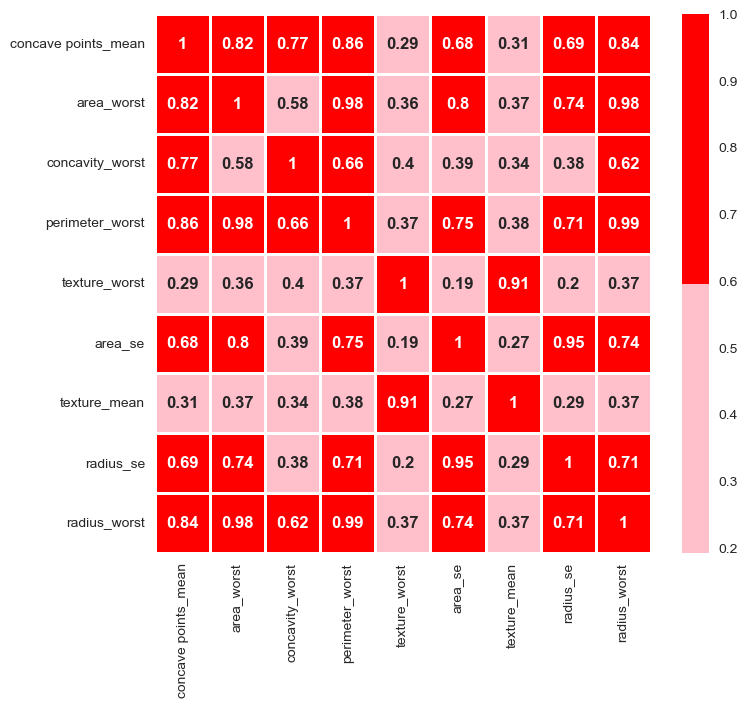

In [ ]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(8,7))
custom_cmap = ListedColormap(['pink','red'])
sns.heatmap(X_train_selected.corr(),cmap=custom_cmap, linewidths=2, linecolor='white', annot=True,annot_kws={"weight": "bold"})

In [ ]:
counter_imp = Counter(y_train)
counter_imp

Counter({'M': 173, 'B': 282})

# K-Mean Cluster method to observe Clusters


In [ ]:
wcss_sm = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=10)
    kmeans.fit(X_train_selected)
    wcss_sm.append(kmeans.inertia_)

E:\applications\Anaconda\files\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\applications\Anaconda\files\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
E:\applications\Anaconda\files\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\applications\Anaconda\files\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it 

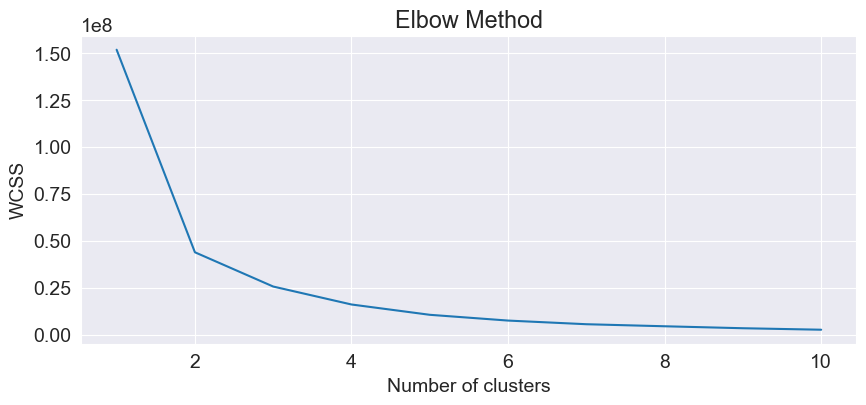

In [ ]:
plt.plot(range(1, 11), wcss_sm)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [ ]:
kmeans2_sm = KMeans(n_clusters=2, random_state=10, n_init=25, algorithm='lloyd')
kmeans2_sm.fit(X_train_selected)

# output
zero = []
one = []
for i in kmeans2_sm.labels_:
    if i == 0:
        zero.append(i)
    else:
        one.append(i)


print('\n',
      "Cluster centers:", '\n',
      "Cluster 0 :", kmeans2_sm.cluster_centers_[0],'\n',
       "Cluster 1 :", kmeans2_sm.cluster_centers_[1], '\n','\n',
        "Clustering vector:" ,'\n', kmeans2_sm.labels_, '\n','\n',
         "Total Within Cluster Sum of Squares : ", '\n',
         kmeans2_sm.inertia_ , '\n',
          "Observation numbers :", '\n',
          "Cluster 0 :", len(zero), '\n',
          "Cluster 1 :", len(one))


 Cluster centers: 
 Cluster 0 : [3.40406167e-02 6.25486167e+02 2.17175928e-01 9.25171182e+01
 2.45366859e+01 2.39444755e+01 1.84163977e+01 3.06176369e-01
 1.41207839e+01] 
 Cluster 1 : [1.02754444e-01 1.76561111e+03 4.63531481e-01 1.59570370e+02
 2.88966667e+01 9.74581481e+01 2.18100926e+01 7.54782407e-01
 2.38275000e+01] 
 
 Clustering vector: 
 [1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0
 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0

E:\applications\Anaconda\files\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [ ]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


E:\applications\Anaconda\files\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


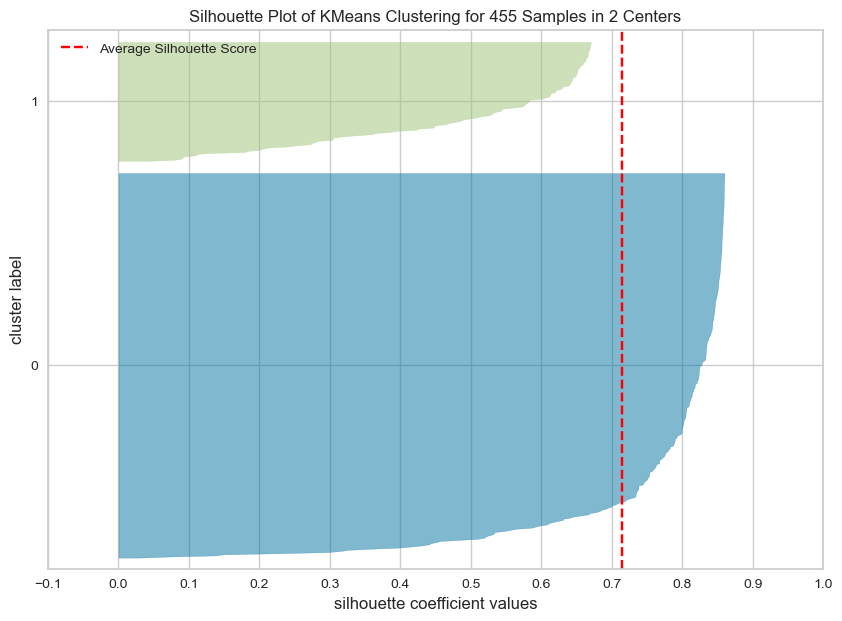

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 455 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=2, n_init=25, random_state=10))

In [ ]:
from yellowbrick.cluster import silhouette_visualizer
plt.figure(figsize=(10,7))
silhouette_visualizer(kmeans2_sm, X_train_selected, colors='yellowbrick')